### Import Libraries and Datasets

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path
%matplotlib inline

In [11]:
fake_news = pd.read_csv('fake.csv')
fn_df=fake_news.loc[fake_news.language == 'english',['title','text']] 
fn_df.isnull().sum() # Validate for NaN
fn_df.text.fillna(fn_df.title, inplace=True)
fn_df.title.fillna(fn_df.text, inplace=True)
faketotal = ' '.join(fn_df.loc[:,'text'])

In [12]:
all_news1 = pd.read_csv('all-the-news/articles1.csv', index_col=0)
all_news2 = pd.read_csv('all-the-news/articles2.csv', index_col=0)
all_news3 = pd.read_csv('all-the-news/articles3.csv', index_col=0)
all_news = pd.concat([all_news1, all_news2, all_news3])

all_news = all_news.loc[~all_news.title.isnull()]
all_news=all_news.sample(10000)

### Creating Cover Wordcloud from Fake News Dataset

#### Without Border

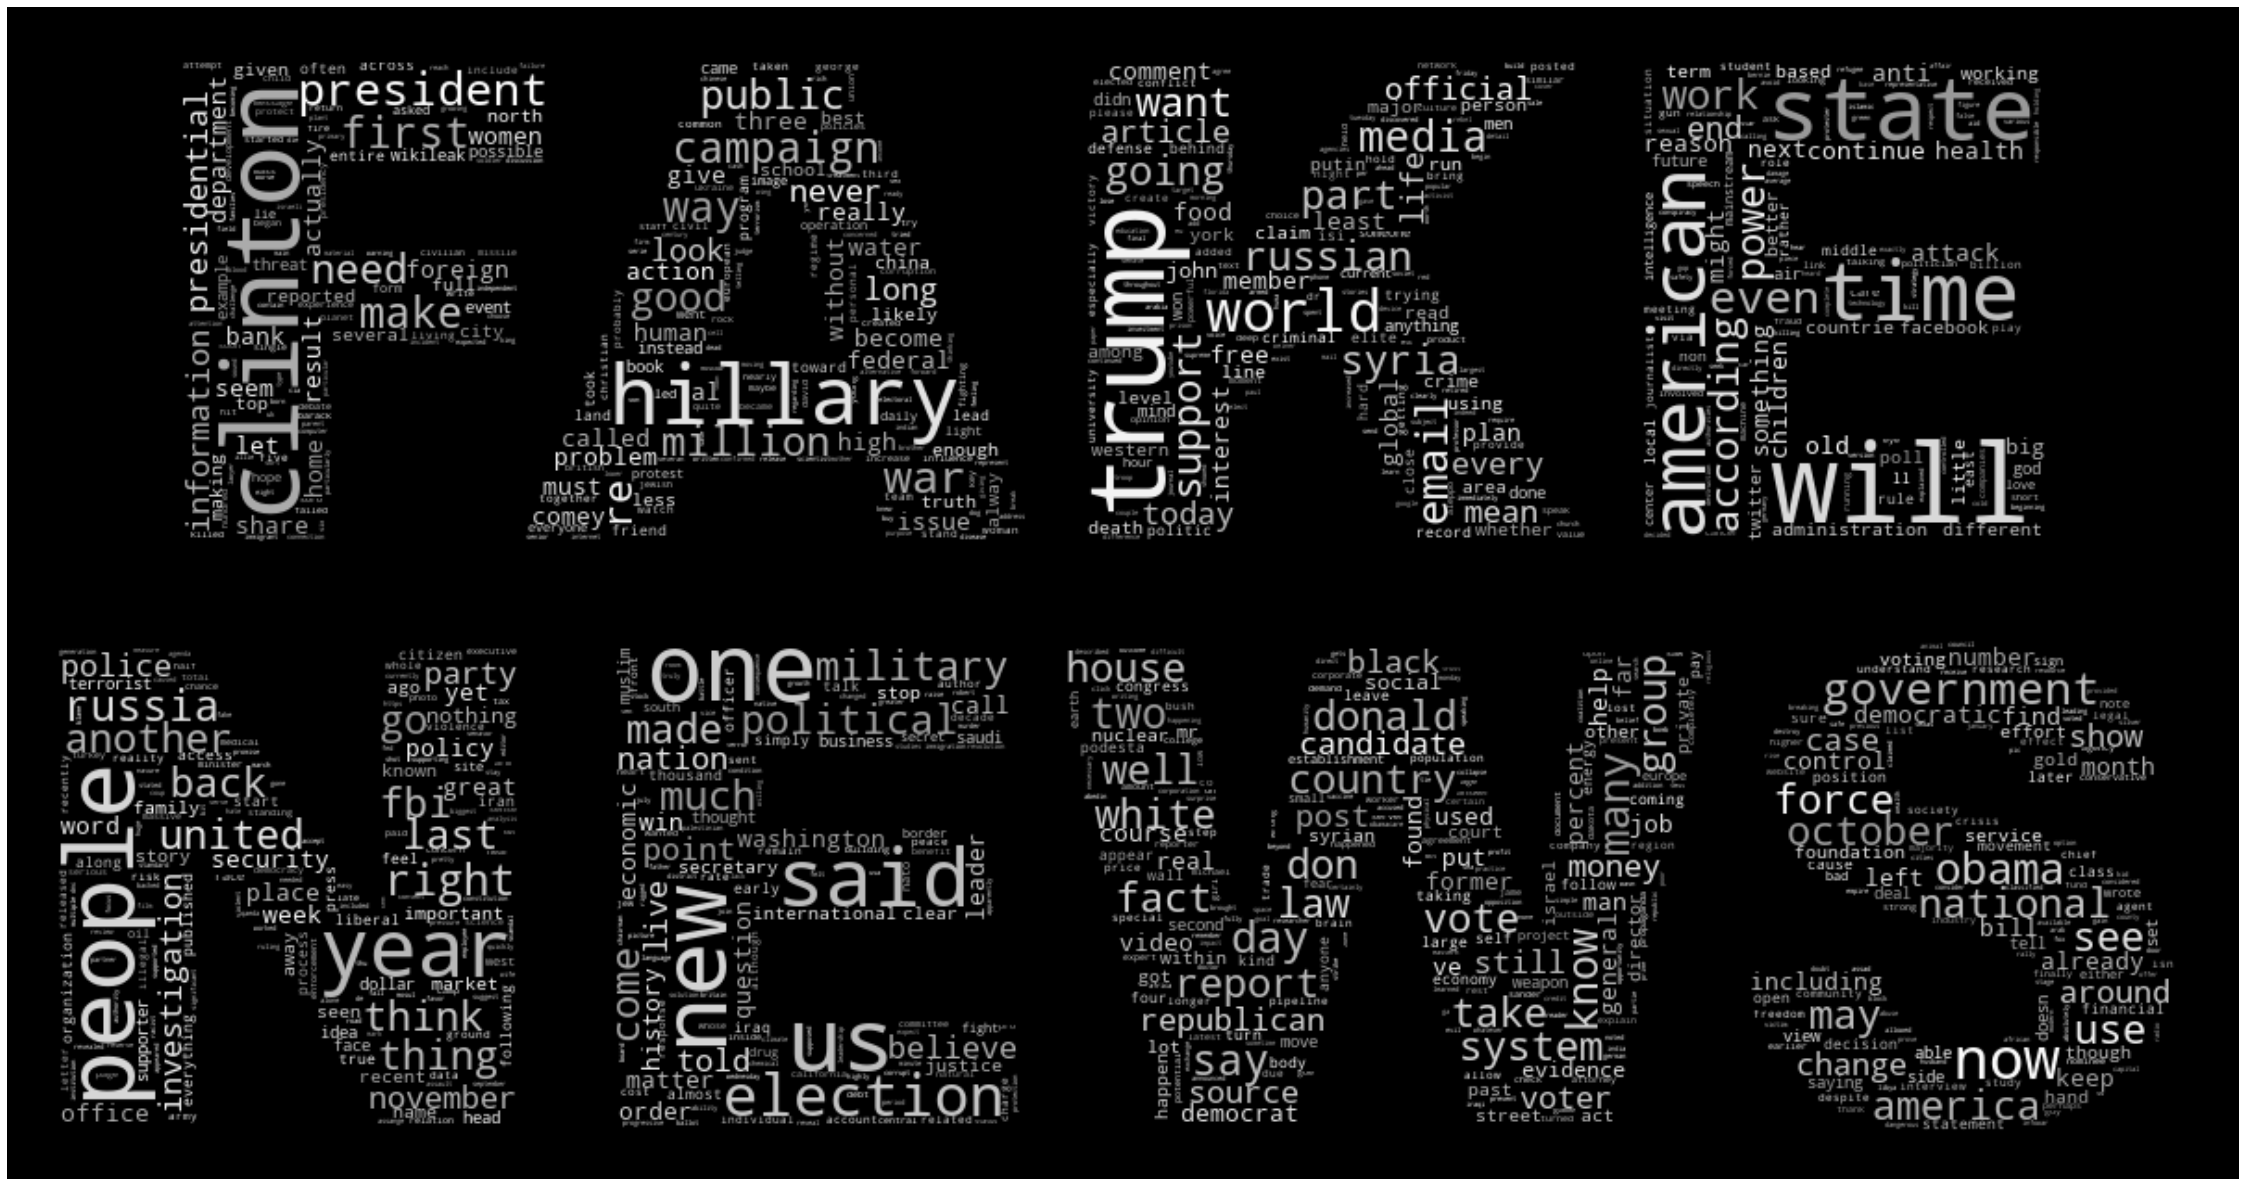

In [17]:
def grey_color_func(word, font_size, position, orientation,random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

mask = np.array(Image.open(path.join("Fake_News_Title.png")))
text = faketotal.lower()
stopwords = set(STOPWORDS)

wc = WordCloud(max_words=100000, width=1000, height=800,mask=mask, stopwords=stopwords,\
              background_color='black',color_func=grey_color_func, collocations= False).generate(text)

default_colors = wc.to_array()

plt.figure( figsize=(40,40) )
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
wc.to_file('pp_title.png')
plt.show()

#### With Border

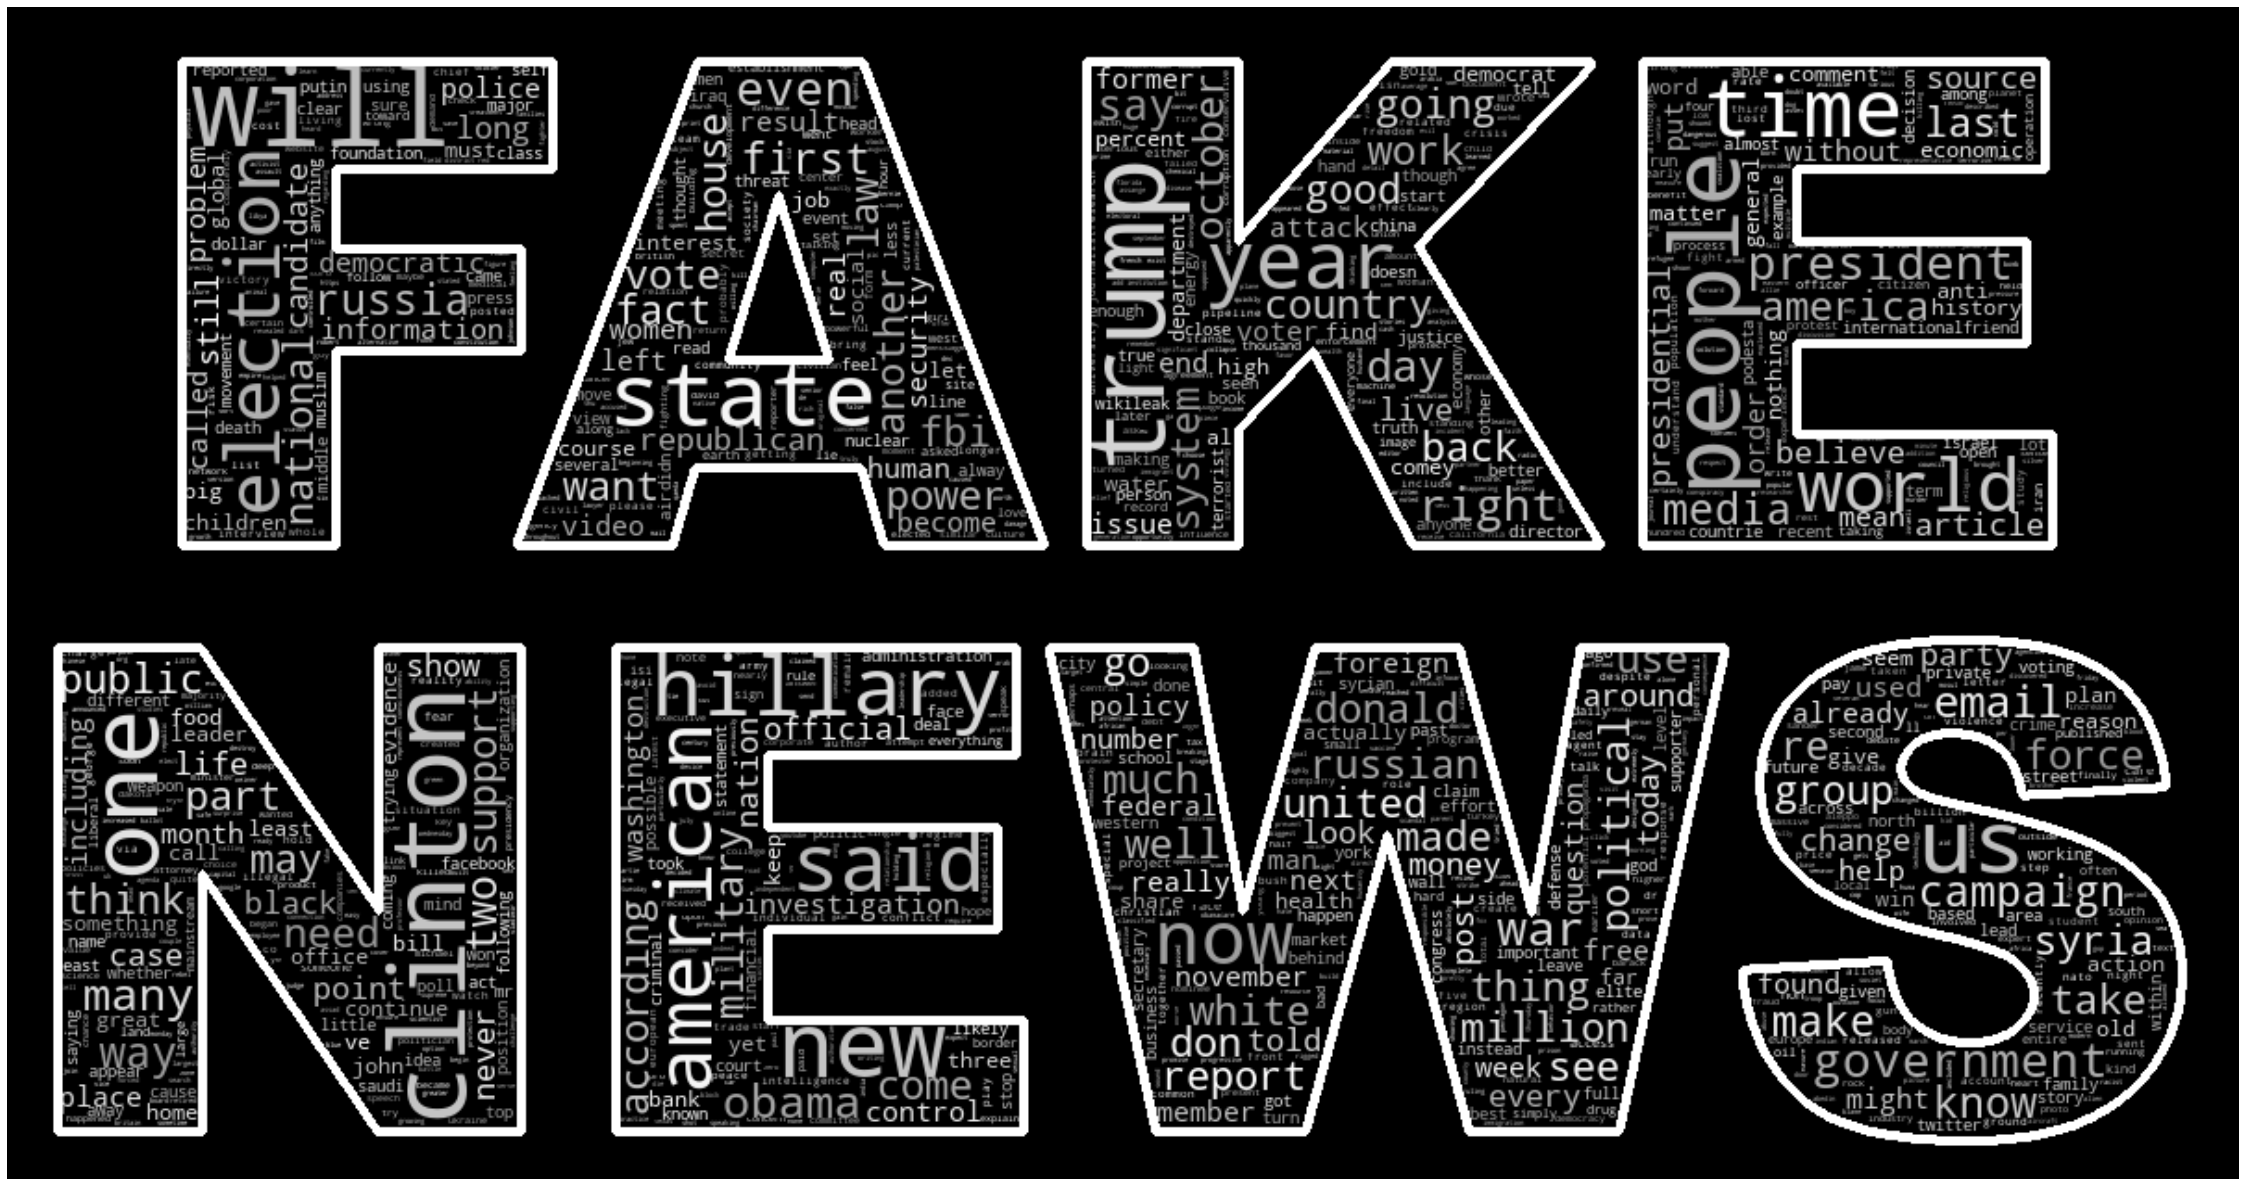

In [18]:
wc = WordCloud(max_words=100000, width=1000, height=800, font_step=1,mask=mask,stopwords=stopwords,\
               background_color='black', color_func=grey_color_func, collocations= False,\
               contour_width=5, contour_color= 'white').generate(text)

default_colors = wc.to_array()

plt.figure( figsize=(40,40) )
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

### Creating WordClouds for Fake and True DataSets

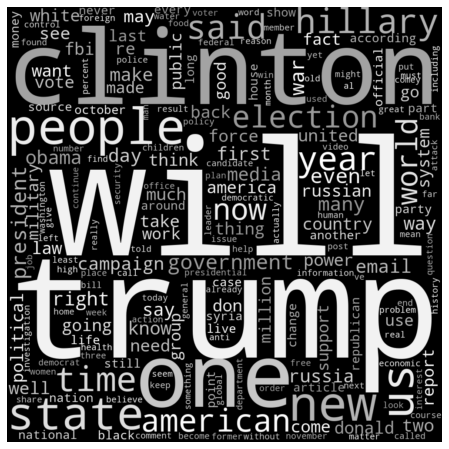

In [19]:
def grey_color_func2(word, font_size, position, orientation,random_state=None, **kwargs):
    return "hsl(1, 1%%, %d%%)" % random.randint(0, 59)


wc = WordCloud(max_words=200, width=1000, height=1000,\
               stopwords=stopwords,background_color='black',\
               color_func=grey_color_func, margin=0, collocations= False).generate(text)

default_colors = wc.to_array()

plt.figure( figsize=(8,8) )
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
wc.to_file('bow_fake.png')
plt.show()

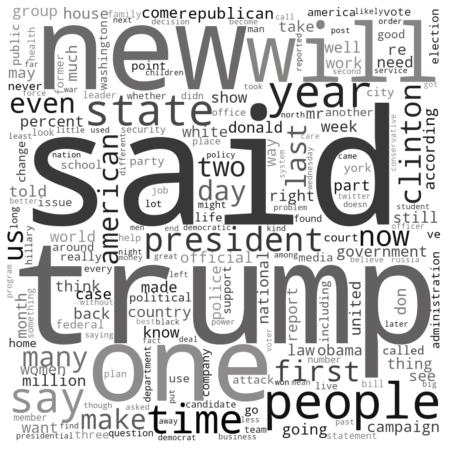

In [20]:
ttotal = (all_news.loc[:,'content'])
text2 = ' '.join(ttotal).lower()

wc = WordCloud(max_words=200, width=1000, height=1000,\
               stopwords=stopwords,background_color='white',\
               color_func=grey_color_func2, margin=0, collocations= False).generate(text2)

default_colors = wc.to_array()

plt.figure( figsize=(8,8) )
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
wc.to_file('bow_true.png')
plt.show()